In [10]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import contractions
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import json

Data preprocessing

In [2]:

def small(data):
    return data.lower()
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
def cleaning_contractions(text):
    text=text.split()
    corrected=[]
    for word in text:
        corrected.append(contractions.fix(word))
    return " ".join(corrected)
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    return re.sub(re.compile("["+punctuations_list+"‼️’]")," ",text)
stop_words = stopwords.words('english')
def cleaning_stopwords(data):
    words = data.split()
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text


In [3]:
df=pd.read_csv("..\\dataset\\cyberattacks.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   attack   220 non-null    object
 1   phrases  220 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [5]:
attack_keys=df.attack.unique()
print(attack_keys)
attackwords=dict()

['phishing' 'Spear Phishing' 'Malware Distribution' 'Ransomware Attacks'
 'Business Email Compromise' 'Email Spoofing' 'Credential Theft'
 'SMS Phishing' 'Instant Messaging Malware Distribution'
 'Social Engineering' 'Message Spoofing for Phishing']


In [46]:
tempset=set()
dftemp=df[df.attack=="phishing"]
for i in range(20):
    tempset.add(dftemp.iloc[i,1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   attack   20 non-null     object
 1   phrases  20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes
None


In [45]:
tempset

{'Access your prize by clicking the link.',
 'Account compromise alert - log in to secure your data.',
 'Confirm your personal information to prevent a lockout.',
 "Congratulations, you've won a prize! Click here to claim.",
 'Immediate action required - verify your account.',
 'Important security update - please log in.',
 'Please update your personal information immediately.',
 'Review and update your account information.',
 'Suspicious activity detected in your account.',
 'Suspicious login attempt - confirm your identity.',
 'Unlock your account by confirming your credentials.',
 'Urgent account verification - please click to proceed.',
 'Urgent message from your bank - action required.',
 'Verify your account information now.',
 "You've been selected for an exclusive offer - act now.",
 'Your account has been suspended - verify your details.',
 'Your account needs immediate attention - click to resolve.',
 'Your account status is in jeopardy - confirm now.',
 'Your email account i

In [30]:
cleanedinputs=[]# stores the cleaned data
wordmap=dict()
for i in tempset:
    temp=small(i)
    temp=cleaning_numbers(temp)
    temp=cleaning_contractions(temp)
    temp=cleaning_punctuations(temp)
    temp=cleaning_stopwords(temp)
    if temp!="":
        cleanedinputs.append(temp)
        keys=set(wordmap.keys())
        for j in temp.split():
            if j not in keys:
                wordmap[j]=[i]
            else:
                wordmap[j].append(i) #mapping the maps to their sentences

In [31]:
for k,v in wordmap.items():
    print(k,":",v)

account : ['Your account has been suspended - verify your details.', 'Immediate action required - verify your account.', 'Account compromise alert - log in to secure your data.', 'Your account status is in jeopardy - confirm now.', 'Review and update your account information.', 'Your email account is at risk - verify your information.', 'Suspicious activity detected in your account.', 'Unlock your account by confirming your credentials.', 'Verify your account information now.', 'Your account needs immediate attention - click to resolve.', 'Urgent account verification - please click to proceed.']
suspended : ['Your account has been suspended - verify your details.']
verify : ['Your account has been suspended - verify your details.', 'Immediate action required - verify your account.', 'Your email account is at risk - verify your information.', 'Verify your account information now.']
details : ['Your account has been suspended - verify your details.']
immediate : ['Immediate action requir

In [33]:
words=[]
for i in cleanedinputs:
    words.extend(i.split())
#print(words)
phishing=Counter(words) #counting occurance of each word using counter class
print(phishing)

Counter({'account': 11, 'information': 5, 'verify': 4, 'click': 4, 'log': 3, 'confirm': 3, 'update': 3, 'please': 3, 'immediate': 2, 'action': 2, 'required': 2, 'login': 2, 'prize': 2, 'personal': 2, 'suspicious': 2, 'urgent': 2, 'suspended': 1, 'details': 1, 'compromise': 1, 'alert': 1, 'secure': 1, 'data': 1, 'status': 1, 'jeopardy': 1, 'session': 1, 'expired': 1, 'review': 1, 'important': 1, 'security': 1, 'access': 1, 'clicking': 1, 'link': 1, 'email': 1, 'risk': 1, 'prevent': 1, 'lockout': 1, 'activity': 1, 'detected': 1, 'unlock': 1, 'confirming': 1, 'credentials': 1, 'needs': 1, 'attention': 1, 'resolve': 1, 'immediately': 1, 'congratulations': 1, 'claim': 1, 'verification': 1, 'proceed': 1, 'attempt': 1, 'identity': 1, 'selected': 1, 'exclusive': 1, 'offer': 1, 'act': 1, 'message': 1, 'bank': 1})


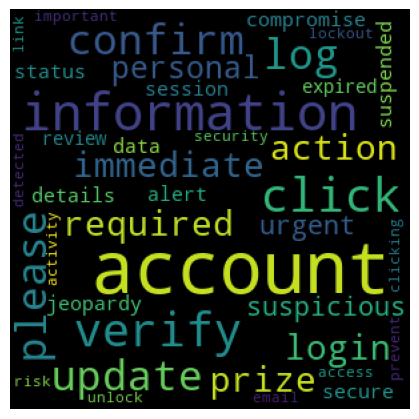

In [35]:
comment_words = " ".join(words)+ " "
#print(comment_words)
wordcloud = WordCloud(width = 300, height = 300,background_color ='black',min_font_size = 10).generate(comment_words)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

generating dictionary of the most occuring words of each attack

PHISHING
account : 0.11827956989247312
information : 0.053763440860215055
click : 0.043010752688172046
verify : 0.043010752688172046
confirm : 0.03225806451612903
update : 0.03225806451612903
please : 0.03225806451612903
log : 0.03225806451612903
prize : 0.021505376344086023
immediate : 0.021505376344086023
personal : 0.021505376344086023
suspicious : 0.021505376344086023
login : 0.021505376344086023
urgent : 0.021505376344086023
action : 0.021505376344086023
required : 0.021505376344086023
selected : 0.010752688172043012
exclusive : 0.010752688172043012
offer : 0.010752688172043012
act : 0.010752688172043012
congratulations : 0.010752688172043012
claim : 0.010752688172043012
needs : 0.010752688172043012
attention : 0.010752688172043012
resolve : 0.010752688172043012
prevent : 0.010752688172043012
lockout : 0.010752688172043012
email : 0.010752688172043012
risk : 0.010752688172043012
access : 0.010752688172043012
clicking : 0.010752688172043012
link : 0.010752688172043012
review : 0.01

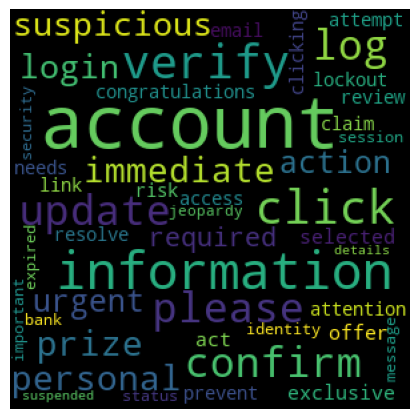

SPEAR PHISHING
please : 0.09615384615384616
reply : 0.038461538461538464
financial : 0.028846153846153848
sensitive : 0.028846153846153848
update : 0.028846153846153848
confirm : 0.028846153846153848
document : 0.019230769230769232
review : 0.019230769230769232
urgent : 0.019230769230769232
need : 0.019230769230769232
matter : 0.019230769230769232
details : 0.019230769230769232
confidential : 0.019230769230769232
project : 0.019230769230769232
employee : 0.019230769230769232
respond : 0.019230769230769232
request : 0.019230769230769232
wire : 0.019230769230769232
meeting : 0.019230769230769232
upcoming : 0.019230769230769232
message : 0.019230769230769232
acknowledge : 0.019230769230769232
receipt : 0.019230769230769232
needed : 0.019230769230769232
important : 0.009615384615384616
hr : 0.009615384615384616
sign : 0.009615384615384616
assistance : 0.009615384615384616
verify : 0.009615384615384616
company : 0.009615384615384616
action : 0.009615384615384616
required : 0.009615384615384

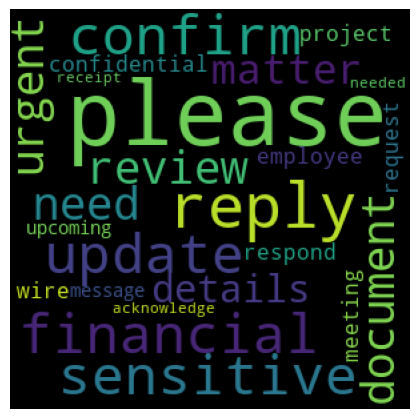

MALWARE DISTRIBUTION
attached : 0.08571428571428572
open : 0.06666666666666667
please : 0.047619047619047616
document : 0.0380952380952381
file : 0.0380952380952381
access : 0.02857142857142857
opening : 0.02857142857142857
attachment : 0.02857142857142857
review : 0.02857142857142857
download : 0.02857142857142857
important : 0.02857142857142857
message : 0.01904761904761905
read : 0.01904761904761905
details : 0.01904761904761905
e : 0.01904761904761905
click : 0.01904761904761905
payment : 0.009523809523809525
receipt : 0.009523809523809525
confirm : 0.009523809523809525
prize : 0.009523809523809525
account : 0.009523809523809525
statement : 0.009523809523809525
resume : 0.009523809523809525
job : 0.009523809523809525
application : 0.009523809523809525
urgent : 0.009523809523809525
ceo : 0.009523809523809525
track : 0.009523809523809525
package : 0.009523809523809525
secure : 0.009523809523809525
gift : 0.009523809523809525
voucher : 0.009523809523809525
contract : 0.009523809523809

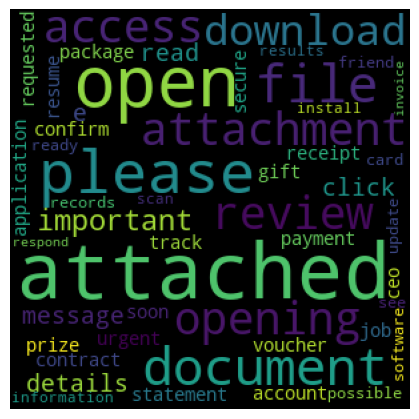

RANSOMWARE ATTACKS
pay : 0.10112359550561797
payment : 0.07865168539325842
data : 0.07865168539325842
files : 0.06741573033707865
ransom : 0.06741573033707865
send : 0.0449438202247191
access : 0.0449438202247191
make : 0.033707865168539325
encrypted : 0.033707865168539325
regain : 0.033707865168539325
control : 0.033707865168539325
compromised : 0.033707865168539325
decryption : 0.02247191011235955
urgent : 0.02247191011235955
documents : 0.02247191011235955
recover : 0.02247191011235955
decrypt : 0.02247191011235955
bitcoin : 0.02247191011235955
instructions : 0.02247191011235955
system : 0.02247191011235955
breach : 0.02247191011235955
inaccessible : 0.011235955056179775
restricted : 0.011235955056179775
hijacked : 0.011235955056179775
release : 0.011235955056179775
unlock : 0.011235955056179775
important : 0.011235955056179775
time : 0.011235955056179775
running : 0.011235955056179775
lose : 0.011235955056179775
locked : 0.011235955056179775
ransomware : 0.011235955056179775
infect

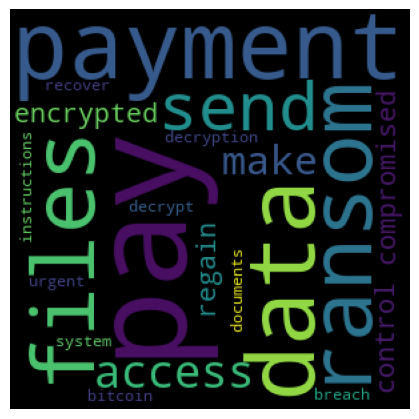

BUSINESS EMAIL COMPROMISE
please : 0.10619469026548672
payment : 0.07964601769911504
confirm : 0.05309734513274336
request : 0.05309734513274336
urgent : 0.035398230088495575
wire : 0.035398230088495575
transfer : 0.035398230088495575
action : 0.02654867256637168
needed : 0.02654867256637168
instructions : 0.02654867256637168
financial : 0.02654867256637168
update : 0.02654867256637168
details : 0.02654867256637168
act : 0.02654867256637168
acknowledge : 0.02654867256637168
required : 0.017699115044247787
verify : 0.017699115044247787
invoice : 0.017699115044247787
proceed : 0.017699115044247787
matter : 0.017699115044247787
important : 0.017699115044247787
ceo : 0.017699115044247787
initiate : 0.017699115044247787
transaction : 0.017699115044247787
process : 0.008849557522123894
critical : 0.008849557522123894
send : 0.008849557522123894
assistance : 0.008849557522123894
prompt : 0.008849557522123894
response : 0.008849557522123894
change : 0.008849557522123894
promptly : 0.0088495575

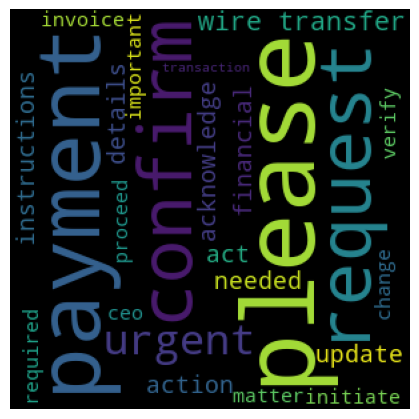

EMAIL SPOOFING
click : 0.09722222222222222
open : 0.06944444444444445
shared : 0.05555555555555555
message : 0.05555555555555555
important : 0.041666666666666664
document : 0.041666666666666664
read : 0.041666666666666664
sent : 0.041666666666666664
friend : 0.041666666666666664
colleague : 0.027777777777777776
coworker : 0.027777777777777776
attachment : 0.027777777777777776
family : 0.027777777777777776
member : 0.027777777777777776
trusted : 0.027777777777777776
link : 0.027777777777777776
view : 0.027777777777777776
received : 0.013888888888888888
service : 0.013888888888888888
provider : 0.013888888888888888
verify : 0.013888888888888888
account : 0.013888888888888888
access : 0.013888888888888888
urgent : 0.013888888888888888
file : 0.013888888888888888
voicemail : 0.013888888888888888
source : 0.013888888888888888
listen : 0.013888888888888888
update : 0.013888888888888888
manager : 0.013888888888888888
contact : 0.013888888888888888
boss : 0.013888888888888888
video : 0.0138888

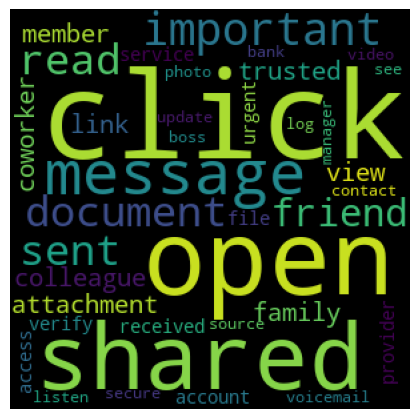

CREDENTIAL THEFT
account : 0.09278350515463918
login : 0.07216494845360824
confirm : 0.061855670103092786
please : 0.05154639175257732
access : 0.05154639175257732
password : 0.05154639175257732
identity : 0.041237113402061855
reset : 0.030927835051546393
action : 0.030927835051546393
credentials : 0.030927835051546393
verify : 0.030927835051546393
required : 0.030927835051546393
locked : 0.020618556701030927
information : 0.020618556701030927
denied : 0.020618556701030927
security : 0.020618556701030927
update : 0.020618556701030927
immediate : 0.020618556701030927
unauthorized : 0.020618556701030927
detected : 0.020618556701030927
protect : 0.020618556701030927
details : 0.020618556701030927
compromised : 0.020618556701030927
email : 0.010309278350515464
risk : 0.010309278350515464
session : 0.010309278350515464
expired : 0.010309278350515464
log : 0.010309278350515464
changed : 0.010309278350515464
breach : 0.010309278350515464
try : 0.010309278350515464
incorrect : 0.01030927835051

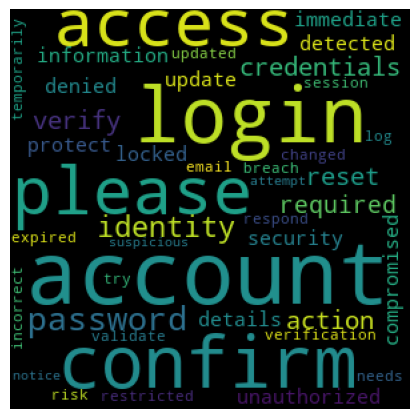

SMS PHISHING
account : 0.08333333333333333
update : 0.041666666666666664
link : 0.03125
access : 0.03125
identity : 0.03125
login : 0.03125
click : 0.020833333333333332
needed : 0.020833333333333332
number : 0.020833333333333332
claim : 0.020833333333333332
verify : 0.020833333333333332
avoid : 0.020833333333333332
bank : 0.020833333333333332
call : 0.020833333333333332
activity : 0.020833333333333332
detected : 0.020833333333333332
confirm : 0.020833333333333332
information : 0.020833333333333332
verification : 0.020833333333333332
exclusive : 0.010416666666666666
content : 0.010416666666666666
urgent : 0.010416666666666666
security : 0.010416666666666666
unlock : 0.010416666666666666
verifying : 0.010416666666666666
mobile : 0.010416666666666666
package : 0.010416666666666666
delivery : 0.010416666666666666
delayed : 0.010416666666666666
address : 0.010416666666666666
congratulations : 0.010416666666666666
gift : 0.010416666666666666
card : 0.010416666666666666
suspension : 0.0104166

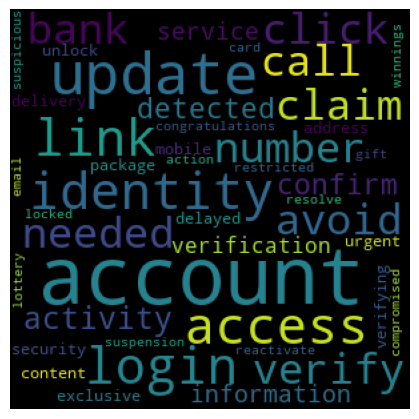

INSTANT MESSAGING MALWARE DISTRIBUTION
clicking : 0.06521739130434782
link : 0.06521739130434782
download : 0.06521739130434782
access : 0.043478260869565216
open : 0.03260869565217391
click : 0.03260869565217391
exclusive : 0.03260869565217391
e : 0.03260869565217391
video : 0.021739130434782608
app : 0.021739130434782608
features : 0.021739130434782608
get : 0.021739130434782608
document : 0.021739130434782608
view : 0.021739130434782608
latest : 0.021739130434782608
update : 0.021739130434782608
ready : 0.021739130434782608
event : 0.021739130434782608
attachment : 0.010869565217391304
detailed : 0.010869565217391304
instructions : 0.010869565217391304
check : 0.010869565217391304
funny : 0.010869565217391304
must : 0.010869565217391304
see : 0.010869565217391304
prize : 0.010869565217391304
provided : 0.010869565217391304
claim : 0.010869565217391304
discount : 0.010869565217391304
coupon : 0.010869565217391304
newest : 0.010869565217391304
wallpaper : 0.010869565217391304
agenda :

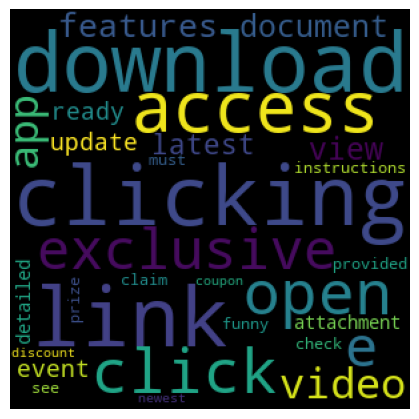

SOCIAL ENGINEERING
send : 0.08888888888888889
money : 0.07777777777777778
help : 0.05555555555555555
need : 0.05555555555555555
name : 0.044444444444444446
financial : 0.044444444444444446
transfer : 0.03333333333333333
funds : 0.03333333333333333
hi : 0.022222222222222223
friend : 0.022222222222222223
account : 0.022222222222222223
assistance : 0.022222222222222223
details : 0.022222222222222223
urgent : 0.011111111111111112
issue : 0.011111111111111112
emergency : 0.011111111111111112
provide : 0.011111111111111112
unlock : 0.011111111111111112
exclusive : 0.011111111111111112
content : 0.011111111111111112
us : 0.011111111111111112
username : 0.011111111111111112
password : 0.011111111111111112
bind : 0.011111111111111112
stranded : 0.011111111111111112
urgently : 0.011111111111111112
donate : 0.011111111111111112
charity : 0.011111111111111112
good : 0.011111111111111112
cousin : 0.011111111111111112
wire : 0.011111111111111112
crisis : 0.011111111111111112
immediately : 0.01111111

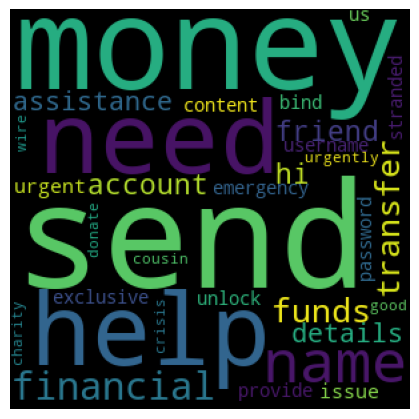

MESSAGE SPOOFING FOR PHISHING
click : 0.09722222222222222
open : 0.06944444444444445
shared : 0.05555555555555555
message : 0.05555555555555555
important : 0.041666666666666664
document : 0.041666666666666664
read : 0.041666666666666664
sent : 0.041666666666666664
friend : 0.041666666666666664
colleague : 0.027777777777777776
coworker : 0.027777777777777776
attachment : 0.027777777777777776
family : 0.027777777777777776
member : 0.027777777777777776
trusted : 0.027777777777777776
link : 0.027777777777777776
view : 0.027777777777777776
received : 0.013888888888888888
service : 0.013888888888888888
provider : 0.013888888888888888
verify : 0.013888888888888888
account : 0.013888888888888888
access : 0.013888888888888888
urgent : 0.013888888888888888
file : 0.013888888888888888
voicemail : 0.013888888888888888
source : 0.013888888888888888
listen : 0.013888888888888888
update : 0.013888888888888888
manager : 0.013888888888888888
contact : 0.013888888888888888
boss : 0.013888888888888888
vi

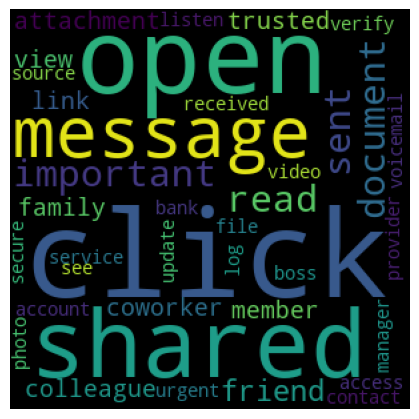

In [21]:
attackwords=dict()
for i in attack_keys:
    tempset=set()
    dftemp=df[df.attack==i]
    for j in range(len(dftemp)):
        tempset.add(dftemp.iloc[j,1])
    cleanedinputs=[]# stores the cleaned data
    for j in tempset:
        temp=small(j)
        temp=cleaning_numbers(temp)
        temp=cleaning_contractions(temp)
        temp=cleaning_punctuations(temp)
        temp=cleaning_stopwords(temp)
        if temp!="":
            cleanedinputs.append(temp)
        
    words=[]
    for j in cleanedinputs:
        words.extend(j.split())
    wordcount=Counter(words) #counting occurance of each word using counter class
    wordcount=dict(wordcount)
    wordcount=dict(sorted(wordcount.items(),key=lambda x: x[1], reverse=True))
    
    total=sum(wordcount.values())
    for j in wordcount.keys():
        wordcount[j]/=total
    attackwords[i]=wordcount #building the dictionary
    print(i.upper())
    for k,v in wordcount.items():
        print(k,":",v)
    words = " ".join(words)+ " "
    wordcloud = WordCloud(width = 300, height = 300,background_color ='black',min_font_size = 10).generate(words)
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [23]:
print(attackwords)

{'phishing': {'account': 0.11827956989247312, 'information': 0.053763440860215055, 'click': 0.043010752688172046, 'verify': 0.043010752688172046, 'confirm': 0.03225806451612903, 'update': 0.03225806451612903, 'please': 0.03225806451612903, 'log': 0.03225806451612903, 'prize': 0.021505376344086023, 'immediate': 0.021505376344086023, 'personal': 0.021505376344086023, 'suspicious': 0.021505376344086023, 'login': 0.021505376344086023, 'urgent': 0.021505376344086023, 'action': 0.021505376344086023, 'required': 0.021505376344086023, 'selected': 0.010752688172043012, 'exclusive': 0.010752688172043012, 'offer': 0.010752688172043012, 'act': 0.010752688172043012, 'congratulations': 0.010752688172043012, 'claim': 0.010752688172043012, 'needs': 0.010752688172043012, 'attention': 0.010752688172043012, 'resolve': 0.010752688172043012, 'prevent': 0.010752688172043012, 'lockout': 0.010752688172043012, 'email': 0.010752688172043012, 'risk': 0.010752688172043012, 'access': 0.010752688172043012, 'clickin

In [26]:
with open("..\\models\\cyberattacks.json", "w") as outfile: 
    json.dump(attackwords, outfile,indent=1)

In [31]:
f=open("..\\models\\cyberattacks.json")
t=json.load(f)
print(t)

{'phishing': {'account': 0.11827956989247312, 'information': 0.053763440860215055, 'click': 0.043010752688172046, 'verify': 0.043010752688172046, 'confirm': 0.03225806451612903, 'update': 0.03225806451612903, 'please': 0.03225806451612903, 'log': 0.03225806451612903, 'prize': 0.021505376344086023, 'immediate': 0.021505376344086023, 'personal': 0.021505376344086023, 'suspicious': 0.021505376344086023, 'login': 0.021505376344086023, 'urgent': 0.021505376344086023, 'action': 0.021505376344086023, 'required': 0.021505376344086023, 'selected': 0.010752688172043012, 'exclusive': 0.010752688172043012, 'offer': 0.010752688172043012, 'act': 0.010752688172043012, 'congratulations': 0.010752688172043012, 'claim': 0.010752688172043012, 'needs': 0.010752688172043012, 'attention': 0.010752688172043012, 'resolve': 0.010752688172043012, 'prevent': 0.010752688172043012, 'lockout': 0.010752688172043012, 'email': 0.010752688172043012, 'risk': 0.010752688172043012, 'access': 0.010752688172043012, 'clickin